In [59]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from folium import Marker
from sklearn.linear_model import LinearRegression
import calendar
import re
from scipy.stats import shapiro

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [3]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('temperature-data-final-2023', '*'))
temp_dir

['temperature-data-final-2023/variables.csv',
 'temperature-data-final-2023/sensor_gps - Sheet1.csv',
 'temperature-data-final-2023/nightday_csv.csv']

In [4]:
nightday_df = pd.read_csv('temperature-data-final-2023/nightday_csv.csv')
nightday_df['date_time'] = pd.to_datetime(nightday_df['date_time'])

nightday_df

,date_time,temp_fahrenheit,Time of Day,sensor_number
0,2023-05-17 00:00:00,65.51,Night,sensor_001
1,2023-05-17 00:05:00,65.28,Night,sensor_001
2,2023-05-17 00:10:00,65.12,Night,sensor_001
3,2023-05-17 00:15:00,64.89,Night,sensor_001
4,2023-05-17 00:20:00,64.81,Night,sensor_001
...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b


In [8]:
# Get the daily max temperature for each day
nightday_df['daily_max_temp'] = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df['date_time'].dt.date])['temp_fahrenheit'].transform('max')
# Create a new column with just the month
nightday_df['month'] = nightday_df['date_time'].dt.month
# Group the data by month, Time of Day, and sensor number
grouped = nightday_df.groupby(['month', 'Time of Day', 'sensor_number'])

# Calculate the average of daily max temperatures for each month
# monthly_avg_max_temps = grouped['daily_max_temp'].mean()

# # Convert the result to a DataFrame
# monthly_avg_max_temps = monthly_avg_max_temps.reset_index()

# # Rename the 'daily_max_temp' column to 'monthly_avg_max_temps'
# monthly_avg_max_temps.rename(columns={'daily_max_temp': 'monthly_avg_max_temp'}, inplace=True)
# monthly_avg_max_temps
nightday_df

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month
0,2023-05-17 00:00:00,65.51,Night,sensor_001,65.51,5
1,2023-05-17 00:05:00,65.28,Night,sensor_001,65.51,5
2,2023-05-17 00:10:00,65.12,Night,sensor_001,65.51,5
3,2023-05-17 00:15:00,64.89,Night,sensor_001,65.51,5
4,2023-05-17 00:20:00,64.81,Night,sensor_001,65.51,5
...,...,...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b,95.70,7
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b,95.70,7
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b,95.70,7
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b,95.70,7


In [26]:
# Just daily max 
# Get the daily max temperature for each day
daily_max_temps = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df['date_time'].dt.date])['temp_fahrenheit'].max()

# Convert the result to a DataFrame
daily_max_temps_df = daily_max_temps.reset_index()

# Rename the temperature column to 'daily_max_temp'
daily_max_temps_df.rename(columns={'temp_fahrenheit': 'daily_max_temp'}, inplace=True)
daily_max_temps_df


,Time of Day,sensor_number,date_time,daily_max_temp
0,Day,sensor_001,2023-05-17,77.86
1,Day,sensor_001,2023-05-18,69.14
2,Day,sensor_001,2023-05-19,56.32
3,Day,sensor_001,2023-05-20,66.74
4,Day,sensor_001,2023-05-21,76.63
...,...,...,...,...
5565,Night,sensor_048b,2023-07-23,66.20
5566,Night,sensor_048b,2023-07-24,72.60
5567,Night,sensor_048b,2023-07-25,71.70
5568,Night,sensor_048b,2023-07-26,76.60


In [27]:
# Get the daily max temperature for each day
nightday_df['daily_max_temp'] = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df['date_time'].dt.date])['temp_fahrenheit'].transform('max')
# Create a new column with just the month
nightday_df['month'] = nightday_df['date_time'].dt.month
# Group the data by month, Time of Day, and sensor number
grouped = nightday_df.groupby(['month', 'Time of Day', 'sensor_number'])

#Calculate the average of daily max temperatures for each month
monthly_avg_max_temps = grouped['daily_max_temp'].mean()

# Convert the result to a DataFrame
monthly_avg_max_temps = monthly_avg_max_temps.reset_index()

# Rename the 'daily_max_temp' column to 'monthly_avg_max_temps'
monthly_avg_max_temps.rename(columns={'daily_max_temp': 'monthly_avg_max_temp'}, inplace=True)
monthly_avg_max_temps


,month,Time of Day,sensor_number,monthly_avg_max_temp
0,5,Day,sensor_001,73.622000
1,5,Day,sensor_002,72.638667
2,5,Day,sensor_003,73.364667
3,5,Day,sensor_004,72.808000
4,5,Day,sensor_005,72.354667
...,...,...,...,...
237,7,Night,sensor_045b,71.325234
238,7,Night,sensor_045c,73.852941
239,7,Night,sensor_047a,74.037349
240,7,Night,sensor_048a,72.207407


In [28]:
# Import other variables 
variables = pd.read_csv('temperature-data-final-2023/variables.csv')
# Convert specific columns to float64
columns_to_convert = ['elevation_terrain_m',
                      'slope_terrain_degree',
                      'aspect_terrain_degree',
                      'cc-densiometer-average']
# Define a dictionary to replace specific non-numeric values with NaN
replace_dict = {'#DIV/0!': float('nan')}  # Add more values if needed

# Remove commas and then convert to float64, replacing specific values with NaN
for column in columns_to_convert:
    variables[column] = pd.to_numeric(variables[column].replace(',', '', regex=True).replace(replace_dict))

variables # Check the data types after conversion


,ID,Name,avg_grass,avg_forb,avg_shrub,avg_bare-ground,avg_a-c-r,avg_water,avg_XL-grass,avg_XL-forb,...,Impervious_percent_cover_5m,Impervious_percent_cover_1m,Canopy_percent_cover_100m,Canopy_percent_cover_50m,Canopy_percent_cover_30m,Canopy_percent_cover_10m,Canopy_percent_cover_5m,Canopy_percent_cover_1m,zone,assoc_tree
0,001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,43.331644,0.000000,0.000000,0.000000,...,0.0010,0.000,0.277,0.348,0.3050,0.400,0.502,0.612,Residental high 1,NaN
1,002,Mapleton Hill,35.689170,38.736282,0.000000,9.199863,31.428772,0.000000,0.000000,0.000000,...,0.0720,0.000,NaN,NaN,NaN,NaN,NaN,NaN,Residental low 1,NaN
2,003,North Boulder Park - A,56.994900,37.785065,0.000000,4.815177,13.461538,0.000000,0.000000,0.000000,...,0.0000,0.000,0.206,0.179,0.1340,0.166,0.083,0.050,Residental low 1,"Fraxinus Americana, #36866"
3,004,North Boulder Park - B,40.990507,33.847650,0.000037,10.871849,29.120370,0.000000,0.000000,0.000000,...,0.1080,0.000,0.334,0.377,0.4670,0.742,0.856,0.855,Residental low 1,"Pinus sylvestris, #36879"
4,005,Foothills Community Park - A,51.587483,36.289349,0.000033,18.428860,4.464992,0.000000,2.948035,0.000000,...,0.0000,0.000,0.010,0.001,0.0001,0.000,0.000,0.000,Public,NaN
5,006,Foothills Community Park - B,18.642920,18.354927,0.000000,11.437773,39.360382,0.000000,4.934211,5.618777,...,0.6030,0.000,0.082,0.043,0.0180,0.023,0.060,0.179,Public,NaN
6,007,Mobile Home Park B,22.012510,26.978840,0.000000,26.393968,29.414838,0.000000,0.000000,1.136364,...,0.0000,0.000,0.111,0.201,0.2490,0.759,0.961,0.968,Residental medium 2,NaN
7,008,Residential - The Hill,32.286205,22.282432,0.000000,12.763830,44.703067,0.000000,0.000000,0.000000,...,0.3250,0.000,0.396,0.314,0.2800,0.231,0.444,0.634,Residental low 1,NaN
8,009,Columbia Cemetery,45.612082,34.901238,0.000032,10.127943,1.807229,0.000000,0.000000,0.000000,...,0.0000,0.000,0.416,0.319,0.3410,0.597,0.802,0.945,Public,NaN
9,010,Low Priority EJ,13.984801,11.923113,0.000000,15.152927,43.787644,0.000000,0.000000,1.655138,...,0.4230,0.000,0.354,0.239,0.1700,0.376,0.573,0.876,Residental low 1,NaN


In [29]:
# Merge data
# Add "sensor_" prefix to the ID column in variables DataFrame
variables['ID'] = 'sensor_' + variables['ID'].astype(str)

#Merge the two DataFrames on 'sensor_number' and 'ID'
monthly_max = pd.merge(monthly_avg_max_temps, variables, left_on='sensor_number', right_on='ID')

# # Print the merged DataFrame
monthly_max

,month,Time of Day,sensor_number,monthly_avg_max_temp,ID,Name,avg_grass,avg_forb,avg_shrub,avg_bare-ground,...,Impervious_percent_cover_5m,Impervious_percent_cover_1m,Canopy_percent_cover_100m,Canopy_percent_cover_50m,Canopy_percent_cover_30m,Canopy_percent_cover_10m,Canopy_percent_cover_5m,Canopy_percent_cover_1m,zone,assoc_tree
0,5,Day,sensor_001,73.622000,sensor_001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
1,5,Night,sensor_001,61.256667,sensor_001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
2,6,Day,sensor_001,75.627333,sensor_001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
3,6,Night,sensor_001,64.312667,sensor_001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
4,7,Day,sensor_001,85.687929,sensor_001,Senior Living Facility,25.285877,13.076931,0.000206,16.938618,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,7,Night,sensor_047a,74.037349,sensor_047a,Valmont disc park irrigated,49.121001,26.594685,0.000110,11.646359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN
238,7,Day,sensor_048a,93.846305,sensor_048a,Sports field irrigated - D,21.832849,18.875685,0.000000,4.502907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN
239,7,Night,sensor_048a,72.207407,sensor_048a,Sports field irrigated - D,21.832849,18.875685,0.000000,4.502907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN
240,7,Day,sensor_048b,89.153115,sensor_048b,Sports field un-irrigated - E,16.944143,23.076218,0.000037,22.090580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN


In [32]:
# Find bin edges (three seperate groups for each)

# Drop rows with missing values in the columns of interest
monthly_max = monthly_max.dropna(subset=['Canopy_percent_cover_50m', 'Impervious_percent_cover_50m'])

# Calculate the bin edges for 'Canopy_percent_cover_50m'
canopy_percentiles = np.percentile(monthly_max['Canopy_percent_cover_50m'], [33.33, 66.67])

# Calculate the bin edges for 'Impervious_percent_cover_50m'
impervious_percentiles = np.percentile(monthly_max['Impervious_percent_cover_50m'], [33.33, 66.67])

# Print the calculated bin edges
print("Canopy Bin Edges:", canopy_percentiles)
print("Impervious Bin Edges:", impervious_percentiles)

Canopy Bin Edges: [0.105 0.239]
Impervious Bin Edges: [0.162 0.516]


In [88]:
# Get bins 

# Define the bin edges for 'Canopy_percent_cover_50m' and 'Impervious_percent_cover_50m'
canopy_percentiles = np.percentile(monthly_max['Canopy_percent_cover_50m'], [0, 33.33, 66.67, 100])
impervious_percentiles = np.percentile(monthly_max['Impervious_percent_cover_50m'], [0, 33.33, 66.67, 100])

# Define bin labels for both cover types (low, moderate, high) with cover type names
canopy_bin_labels = ['low_canopy', 'moderate_canopy', 'high_canopy']
impervious_bin_labels = ['low_impervious', 'moderate_impervious', 'high_impervious']

# Create an empty list to store combined bin labels
combined_bins = []

# Iterate through rows and calculate combined bin labels
for index, row in monthly_max.iterrows():
    canopy_cover = row['Canopy_percent_cover_50m']
    impervious_cover = row['Impervious_percent_cover_50m']
    
    # Check for NaN values and assign a label accordingly
    if np.isnan(canopy_cover) or np.isnan(impervious_cover):
        combined_bin = 'missing_data'
    else:
        canopy_bin = pd.cut([canopy_cover], bins=canopy_percentiles, labels=canopy_bin_labels, include_lowest=True)[0]
        impervious_bin = pd.cut([impervious_cover], bins=impervious_percentiles, labels=impervious_bin_labels, include_lowest=True)[0]
    
        combined_bin = f'{canopy_bin}_{impervious_bin}'
    
    combined_bins.append(combined_bin)

# Add the combined bins to the DataFrame using .loc
monthly_max.loc[:, 'combined_bins'] = combined_bins

# Print the resulting DataFrame with the new combined bins
print(monthly_max[['Canopy_percent_cover_50m', 'Impervious_percent_cover_50m', 'combined_bins']])


     Canopy_percent_cover_50m  Impervious_percent_cover_50m  \
0                       0.348                         0.479   
1                       0.348                         0.479   
2                       0.348                         0.479   
3                       0.348                         0.479   
4                       0.348                         0.479   
..                        ...                           ...   
217                     0.344                         0.524   
218                     0.344                         0.524   
219                     0.344                         0.524   
220                     0.344                         0.524   
221                     0.344                         0.524   

                       combined_bins  
0    high_canopy_moderate_impervious  
1    high_canopy_moderate_impervious  
2    high_canopy_moderate_impervious  
3    high_canopy_moderate_impervious  
4    high_canopy_moderate_impervious  
..       

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_4361/944296664.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_max.loc[:, 'combined_bins'] = combined_bins


In [90]:
# Shaprio tests to determine if data is noramlly distributed 

# Create an empty DataFrame to store the Shapiro-Wilk test results
shapiro_results = pd.DataFrame(columns=['Group', 'Time of Day', 'Month', 'W-statistic', 'P-value'])

# Loop through each 'combined_bins' and 'Time of Day' combination
for bin_name in monthly_max['combined_bins'].unique():
    for time_of_day in monthly_max['Time of Day'].unique():
        # Filter the data for the current combination
        group_df = monthly_max[(monthly_max['combined_bins'] == bin_name) & (monthly_max['Time of Day'] == time_of_day)]
        
        # Loop through each month and perform Shapiro-Wilk test on the monthly max temperatures
        for month in group_df['month'].unique():
            monthly_max_temps = group_df[group_df['month'] == month]['monthly_avg_max_temp']
            
            # Check if there are at least 3 data points for the test
            if len(monthly_max_temps) >= 3:
                w_statistic, p_value = shapiro(monthly_max_temps)
                
                # Append the results to the DataFrame
                shapiro_results = shapiro_results.append({'Group': bin_name, 'Time of Day': time_of_day, 'Month': month, 'W-statistic': w_statistic, 'P-value': p_value}, ignore_index=True)

# Print the Shapiro-Wilk test results
print(shapiro_results)
shapiro_results

# Only use results with a p-vlue over 0.05
shapiro_results_filtered = shapiro_results[shapiro_results['P-value'] > 0.05]
shapiro_results_filtered

                                  Group Time of Day Month  W-statistic  \
0       high_canopy_moderate_impervious         Day     5     0.787074   
1       high_canopy_moderate_impervious         Day     6     0.855227   
2       high_canopy_moderate_impervious         Day     7     0.823287   
3       high_canopy_moderate_impervious       Night     5     0.940635   
4       high_canopy_moderate_impervious       Night     6     0.947920   
5       high_canopy_moderate_impervious       Night     7     0.885345   
6        moderate_canopy_low_impervious         Day     5     0.934801   
7        moderate_canopy_low_impervious         Day     6     0.935238   
8        moderate_canopy_low_impervious         Day     7     0.889787   
9        moderate_canopy_low_impervious       Night     5     0.794421   
10       moderate_canopy_low_impervious       Night     6     0.981424   
11       moderate_canopy_low_impervious       Night     7     0.846705   
12            low_canopy_low_imperviou

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_4361/293400311.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shapiro_results = shapiro_results.append({'Group': bin_name, 'Time of Day': time_of_day, 'Month': month, 'W-statistic': w_statistic, 'P-value': p_value}, ignore_index=True)
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_4361/293400311.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shapiro_results = shapiro_results.append({'Group': bin_name, 'Time of Day': time_of_day, 'Month': month, 'W-statistic': w_statistic, 'P-value': p_value}, ignore_index=True)
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_4361/293400311.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shapir

,Group,Time of Day,Month,W-statistic,P-value
1,high_canopy_moderate_impervious,Day,6,0.855227,0.173382
2,high_canopy_moderate_impervious,Day,7,0.823287,0.094205
3,high_canopy_moderate_impervious,Night,5,0.940635,0.664323
4,high_canopy_moderate_impervious,Night,6,0.947920,0.723407
5,high_canopy_moderate_impervious,Night,7,0.885345,0.294514
6,moderate_canopy_low_impervious,Day,5,0.934801,0.506872
7,moderate_canopy_low_impervious,Day,6,0.935238,0.508566
8,moderate_canopy_low_impervious,Day,7,0.889787,0.353692
9,moderate_canopy_low_impervious,Night,5,0.794421,0.101247
10,moderate_canopy_low_impervious,Night,6,0.981424,0.738885


In [94]:
# ANOVA test day 

# Filter the DataFrame for 'Time of Day' (e.g., 'Day' or 'Night')
time_of_day = 'Day'  # Change this to 'Night' for nighttime analysis

# Create an empty DataFrame to store the ANOVA test results
anova_results = pd.DataFrame(columns=['Group', 'Time of Day', 'F-statistic', 'P-value'])

# Iterate through each combination of 'combined_bins'
for group_name, group_df in monthly_max[(monthly_max['Time of Day'] == time_of_day) & (monthly_max['combined_bins'].isin(shapiro_results_filtered['Group']))].groupby('combined_bins'):
    # Check if there are enough data points for the ANOVA test
    if len(group_df) < 3:
        continue
    
    # Perform the ANOVA test on 'monthly_avg_max_temp' for each month within the group
    f_statistic, p_value = f_oneway(*[group['monthly_avg_max_temp'] for month, group in group_df.groupby('month')])
    
    # Append the results to the DataFrame
    anova_results = anova_results.append({'Group': group_name, 'Time of Day': time_of_day, 'F-statistic': f_statistic, 'P-value': p_value}, ignore_index=True)

# Filter results with a significant p-value (e.g., p < 0.05)
significant_results_day = anova_results[anova_results['P-value'] < 0.05]

# Print the significant results
print(significant_results_day)


                                 Group Time of Day  F-statistic       P-value
1      high_canopy_moderate_impervious         Day    38.157625  1.308006e-06
2           low_canopy_high_impervious         Day   146.635430  1.356151e-07
3            low_canopy_low_impervious         Day    34.070440  1.127101e-05
4      moderate_canopy_high_impervious         Day    15.572363  4.629363e-04
5       moderate_canopy_low_impervious         Day    67.822837  7.600529e-05
6  moderate_canopy_moderate_impervious         Day   176.310118  4.683272e-06


/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_4361/1310759993.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({'Group': group_name, 'Time of Day': time_of_day, 'F-statistic': f_statistic, 'P-value': p_value}, ignore_index=True)
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_4361/1310759993.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({'Group': group_name, 'Time of Day': time_of_day, 'F-statistic': f_statistic, 'P-value': p_value}, ignore_index=True)
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_4361/1310759993.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({'

In [92]:
# ANOVA test night

# Filter the DataFrame for 'Time of Day' (e.g., 'Day' or 'Night')
time_of_day = 'Night'  

# Create an empty DataFrame to store the ANOVA test results
anova_results = pd.DataFrame(columns=['Group', 'Time of Day', 'F-statistic', 'P-value'])

# Iterate through each combination of 'combined_bins'
for group_name, group_df in monthly_max[(monthly_max['Time of Day'] == time_of_day) & (monthly_max['combined_bins'].isin(shapiro_results_filtered['Group']))].groupby('combined_bins'):
    # Rest of the ANOVA code remains the same
    if len(group_df) < 3:
        continue
    
    # Perform the ANOVA test on 'monthly_avg_max_temp' for each month within the group
    f_statistic, p_value = f_oneway(*[group['monthly_avg_max_temp'] for month, group in group_df.groupby('month')])
    
    # Append the results to the DataFrame
    anova_results = anova_results.append({'Group': group_name, 'Time of Day': time_of_day, 'F-statistic': f_statistic, 'P-value': p_value}, ignore_index=True)

# Filter results with a significant p-value (e.g., p < 0.05)
significant_result_night = anova_results[anova_results['P-value'] < 0.05]

# Print the significant results
print(significant_result_night)


                                 Group Time of Day  F-statistic       P-value
0           high_canopy_low_impervious       Night    16.856535  3.448683e-03
1      high_canopy_moderate_impervious       Night   112.007272  9.605102e-10
2           low_canopy_high_impervious       Night   102.153572  6.509790e-07
3            low_canopy_low_impervious       Night    75.698369  1.569015e-07
4      moderate_canopy_high_impervious       Night    12.273047  1.253262e-03
5       moderate_canopy_low_impervious       Night    15.409803  4.327294e-03
6  moderate_canopy_moderate_impervious       Night   548.223060  1.612062e-07


/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_4361/1383163260.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({'Group': group_name, 'Time of Day': time_of_day, 'F-statistic': f_statistic, 'P-value': p_value}, ignore_index=True)
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_4361/1383163260.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({'Group': group_name, 'Time of Day': time_of_day, 'F-statistic': f_statistic, 'P-value': p_value}, ignore_index=True)
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_4361/1383163260.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({'

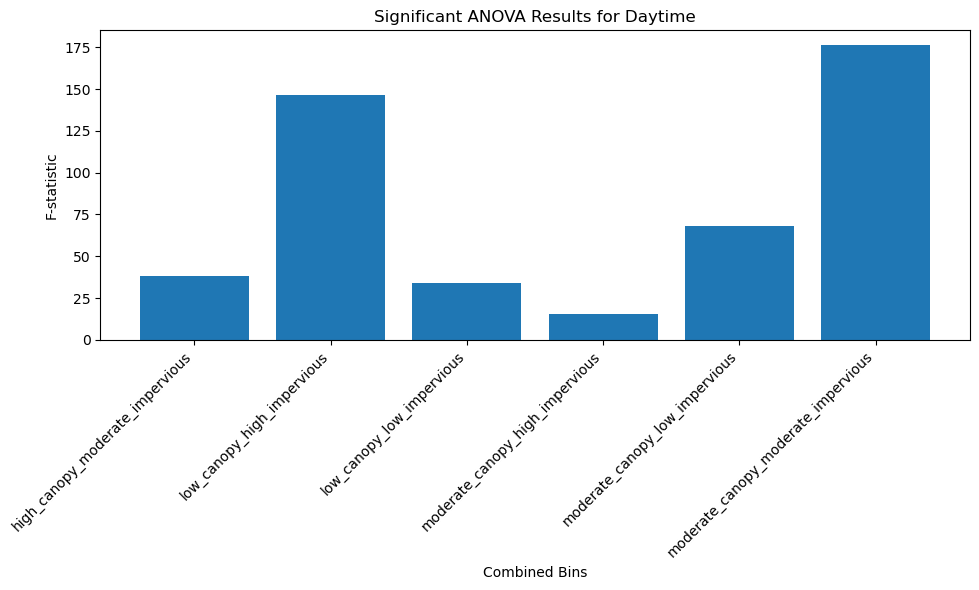

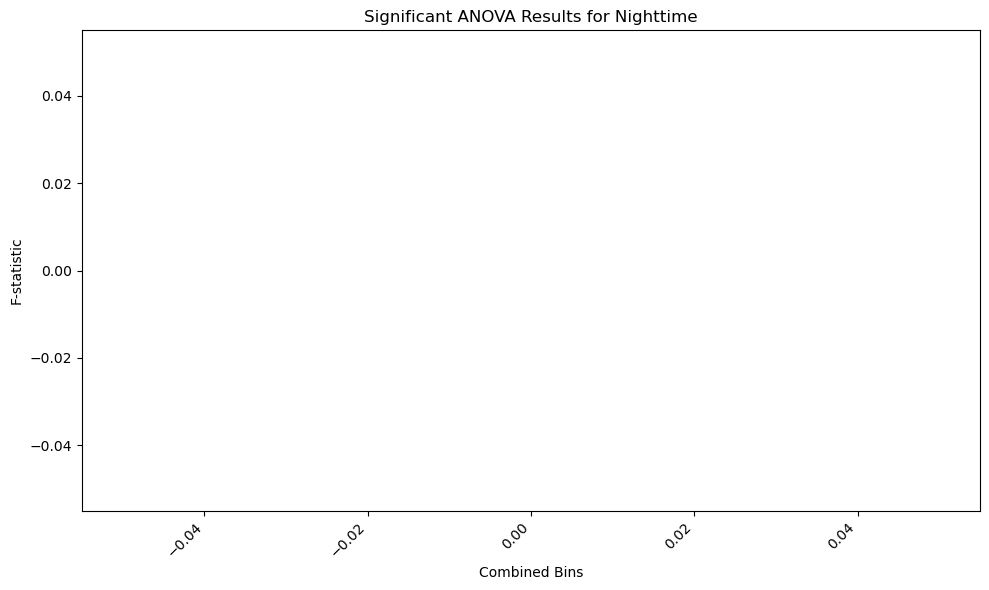

In [95]:
# Sig for day plot 

# Filter the significant ANOVA results for daytime ('Day')
significant_results_day = anova_results[anova_results['P-value'] < 0.05]
significant_results_day = significant_results_day[significant_results_day['Time of Day'] == 'Day']

# Create a bar plot of F-statistic values for each 'combined_bins' group
plt.figure(figsize=(10, 6))
plt.bar(significant_results_day['Group'], significant_results_day['F-statistic'])
plt.xlabel('Combined Bins')
plt.ylabel('F-statistic')
plt.title('Significant ANOVA Results for Daytime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter the significant ANOVA results for daytime ('Day')
significant_results_day = anova_results[anova_results['P-value'] < 0.05]
significant_results_day = significant_results_day[significant_results_day['Time of Day'] == 'Night']

# Create a bar plot of F-statistic values for each 'combined_bins' group
plt.figure(figsize=(10, 6))
plt.bar(significant_results_day['Group'], significant_results_day['F-statistic'])
plt.xlabel('Combined Bins')
plt.ylabel('F-statistic')
plt.title('Significant ANOVA Results for Nighttime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()